
Question 1 


In [1]:
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from this address.
# Step 3. Assign it to a variable called users

import pandas as DK

users = DK.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [2]:
#Step 4 : Discover what is the mean age per occupation

users.groupby('occupation').mean()

,user_id,age
occupation,,
administrator,430.949367,38.746835
artist,451.892857,31.392857
doctor,533.714286,43.571429
educator,466.905263,42.010526
engineer,456.328358,36.388060
entertainment,398.000000,29.222222
executive,422.312500,38.718750
healthcare,501.437500,41.562500
homemaker,443.000000,32.571429


In [3]:
#Step 5 : Discover the Male ratio per occupation and sort it from the most to the least

occupation = users.groupby(['occupation', 'gender'])
counts = occupation.size().unstack()
counts['male_ratio'] = counts['M'] / (counts['M'] + counts['F'])
sorted= counts.sort_values(by='male_ratio', ascending=False)
print(sorted)

gender            F      M  male_ratio
occupation                            
engineer        2.0   65.0    0.970149
technician      1.0   26.0    0.962963
retired         1.0   13.0    0.928571
programmer      6.0   60.0    0.909091
executive       3.0   29.0    0.906250
scientist       3.0   28.0    0.903226
entertainment   2.0   16.0    0.888889
lawyer          2.0   10.0    0.833333
salesman        3.0    9.0    0.750000
educator       26.0   69.0    0.726316
student        60.0  136.0    0.693878
other          36.0   69.0    0.657143
marketing      10.0   16.0    0.615385
writer         19.0   26.0    0.577778
none            4.0    5.0    0.555556
administrator  36.0   43.0    0.544304
artist         13.0   15.0    0.535714
librarian      29.0   22.0    0.431373
healthcare     11.0    5.0    0.312500
homemaker       6.0    1.0    0.142857
doctor          NaN    7.0         NaN


In [4]:
# Step 6: For each occupation, calculate the minimum and maximum ages

min=users.groupby(['occupation'])['age'].min()
max=users.groupby(['occupation'])['age'].max()

result = DK.concat([min,max], axis=1)
result.columns = ['min', 'max']
print(result)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [5]:
# Step 7: For each combination of occupation and sex, calculate the mean age

users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [6]:
# Step 8. For each occupation present the percentage of women and men

x=users.groupby(['occupation','gender'])
y = x.size().unstack()
totals = y.sum(axis=1)
percentage = y.divide(totals, axis=0)
print(percentage)

gender                F         M
occupation                       
administrator  0.455696  0.544304
artist         0.464286  0.535714
doctor              NaN  1.000000
educator       0.273684  0.726316
engineer       0.029851  0.970149
entertainment  0.111111  0.888889
executive      0.093750  0.906250
healthcare     0.687500  0.312500
homemaker      0.857143  0.142857
lawyer         0.166667  0.833333
librarian      0.568627  0.431373
marketing      0.384615  0.615385
none           0.444444  0.555556
other          0.342857  0.657143
programmer     0.090909  0.909091
retired        0.071429  0.928571
salesman       0.250000  0.750000
scientist      0.096774  0.903226
student        0.306122  0.693878
technician     0.037037  0.962963
writer         0.422222  0.577778



Question 2


In [7]:
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from this address
# Step 3. Assign it to a variable called euro12

import pandas as DK
euro12=DK.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [8]:
# Step 4: Select only the Goal column

euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [9]:
# Step 5: How many team participated in the Euro2012?

len(euro12.Team.unique())

16

In [10]:
# Step 6. What is the number of columns in the dataset?

euro12.shape[1]

35

In [11]:

# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
#         to a dataframe called discipline


discipline=euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [12]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards

discipline.sort_values(['Red Cards','Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [13]:
# Step 9. Calculate the mean Yellow Cards given per Team

discipline[['Team','Yellow Cards']].groupby('Team').mean()

,Yellow Cards
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


In [14]:
# Step 10: Filter teams that scored more than 6 goals.

goals=euro12[euro12['Goals']>6]
goals

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [15]:
# Step 11. Select the teams that start with G

euro12[euro12["Team"].str.startswith("G")]["Team"]

5    Germany
6     Greece
Name: Team, dtype: object

In [16]:
# Step 12. Select the first 7 columns

euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [17]:
# Step 13. Select all columns except the last 3

euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [18]:
# Step 14: Present only the Shooting Accuracy from England, Italy and Russia

euro12=euro12[euro12['Team'].isin(['England','Italy','Russia'])]
euro12[['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%



Question 3


In [19]:
# Housing

# Step 1: Import the necessary libraries

import pandas as DK
import numpy as num
import random


# Step 2: Create 3 differents Series, each of length 100, as follows:
# • The first a random number from 1 to 4
# • The second a random number from 1 to 3
# • The third a random number from 10,000 to 30,000

series1 = DK.Series(random.randint(1,4) for _ in range(100))
series2 = DK.Series(random.randint(1,3) for _ in range(100))
series3 = DK.Series(random.randint(10000,30000) for _ in range(100))

# Step 3. Create a DataFrame by joinning the Series by column

series=DK.concat([series1,series2,series3],axis=1)
series

,0,1,2
0,3,2,20515
1,2,3,24206
2,3,3,11519
3,4,2,26258
4,4,2,13707
...,...,...,...
95,3,2,19232
96,3,1,18872
97,3,3,14870
98,2,3,17971


In [20]:
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

series.rename(columns={0:'bedrs',1:'bathrs',2:'price_sqr_meter'},inplace=True)
series

,bedrs,bathrs,price_sqr_meter
0,3,2,20515
1,2,3,24206
2,3,3,11519
3,4,2,26258
4,4,2,13707
...,...,...,...
95,3,2,19232
96,3,1,18872
97,3,3,14870
98,2,3,17971


In [21]:
# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
#         to 'bigcolumn'

bigcolumn = DK.concat([series1, series2, series3])
bigcolumn

0         3
1         2
2         3
3         4
4         4
      ...  
95    19232
96    18872
97    14870
98    17971
99    28909
Length: 300, dtype: int64

In [22]:
# Step 6. Ops it seems it is going only until index 99. Is it true?

bigcolumn.index[-1]==99

True

In [23]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299

bigcolumn.reset_index(drop=True)

0          3
1          2
2          3
3          4
4          4
       ...  
295    19232
296    18872
297    14870
298    17971
299    28909
Length: 300, dtype: int64


Question 4


In [31]:
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from the attached file wind.txt

import pandas as DK
import datetime
wind=DK.read_csv('wind.txt',sep='\s+')
wind

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [32]:
type(wind)

pandas.core.frame.DataFrame

In [33]:
# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
#         datetime index

import pandas as DK
data = DK.read_table('wind.txt', sep='\s+', parse_dates=[[0,1,2]])
data

import datetime
def date_fix(D):
    year = D.year - 100 if D.year > 1988 else D.year
    return datetime.date(year, D.month ,D.day)
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(date_fix)
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [34]:
# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
#           and apply it

data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(date_fix)
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [35]:
# Step 5. Set the right dates as the index. Pay attention at the data type, it should be
#  datetime64[ns].

data["Yr_Mo_Dy"] = DK.to_datetime(data["Yr_Mo_Dy"])
data["Yr_Mo_Dy"]


0      1961-01-01
1      1961-01-02
2      1961-01-03
3      1961-01-04
4      1961-01-05
          ...    
6569   1978-12-27
6570   1978-12-28
6571   1978-12-29
6572   1978-12-30
6573   1978-12-31
Name: Yr_Mo_Dy, Length: 6574, dtype: datetime64[ns]

In [36]:
data = data.set_index('Yr_Mo_Dy')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [37]:
# Step 6. Compute how many values are missing for each location over the entire
#         record.They should be ignored in all calculations below

data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [38]:
data.shape

(6574, 12)

In [39]:
filtered= data.dropna()
filtered.shape

(6546, 12)

In [40]:
# Step 7. Compute how many non-missing values there are in total.

data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [41]:
data.notnull().sum().sum()

78857

In [42]:
#  Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
#          all the times.     A single number for the entire dataset.

meanwindSpeed= filtered.mean()
meanwindSpeed

RPT    12.359979
VAL    10.640267
ROS    11.656396
KIL     6.298587
SHA    10.448923
BIR     7.085066
DUB     9.793006
CLA     8.486601
MUL     8.490257
CLO     8.696705
BEL    13.110668
MAL    15.603129
dtype: float64

In [43]:
# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
# windspeeds and standard deviations of the windspeeds at each location over all the
# days
# A different set of numbers for each location.

loc_stats=filtered.describe()
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000
mean,12.359979,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129
std,5.618805,5.268695,5.007805,3.600942,4.933988,3.967735,4.978030,4.498299,4.165947,4.500488,5.829054,6.702178
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,7.970000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.670000,10.710000
50%,11.710000,10.130000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.250000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.380000,13.540000,9.670000,12.960000,11.420000,11.170000,11.580000,16.880000,19.860000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [44]:
# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
# windspeed and standard deviations of the windspeeds across all the locations at each
# day.
# A different set of numbers for each day

day_stats = DK.DataFrame()
day_stats['min'] = filtered.min(axis = 1) 
day_stats['max'] = filtered.max(axis = 1) 
day_stats['mean'] = filtered.mean(axis = 1) 
day_stats['std'] = filtered.std(axis = 1)
day_stats

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [45]:
# Step 11. Find the average windspeed in January for each location.
# Treat January 1961 and January 1962 both as January.

filtered.loc[filtered.index.month == 1].mean()

RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

In [46]:
# Step 12. Downsample the record to a yearly frequency for each location.

filtered.groupby(filtered.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.207588,10.207206,11.282853,6.846441,10.742735,7.617147,9.633265,8.684912,8.571941,9.700471,13.271559,13.587206
1962,12.274779,10.150856,11.714365,6.964337,10.692265,7.415331,11.043122,8.829807,8.335552,9.693812,12.985691,14.361436
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [47]:
# Step 13. Downsample the record to a monthly frequency for each location.

filtered.groupby(filtered.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.506154,11.225385,12.960385,6.840000,10.509231,8.174231,10.403077,8.670769,8.323462,9.490385,13.270000,14.341538
1961-02,16.401923,15.037308,14.470000,9.242692,13.778077,10.884615,11.868077,11.746154,11.748462,12.626538,18.165000,15.300769
1961-03,10.660000,11.097407,10.420000,7.100741,10.265556,8.580000,9.108519,9.329259,10.100000,10.989630,16.066296,15.418889
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,10.024643,8.495714,10.539286,5.992500,9.480357,6.633929,7.645714,8.206786,8.120714,8.534643,11.912143,11.911786
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [48]:
# Step 14. Downsample the record to a weekly frequency for each location.

filtered.groupby(filtered.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-02/1961-01-08,12.316000,10.408000,10.050000,5.658000,8.506000,6.242000,10.936000,5.932000,8.150000,8.428000,11.416000,13.226000
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,12.100000,9.500000,11.681667,4.293333,8.966667,6.938333,7.828333,7.291667,5.891667,6.693333,9.993333,10.346667
1961-01-23/1961-01-29,19.880000,14.846667,17.548333,11.916667,16.325000,14.016667,14.450000,14.311667,13.316667,14.921667,19.800000,22.388333
1961-01-30/1961-02-05,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [49]:
# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
#  windspeeds across all locations for each week (assume that the first week starts on
#  January 2 1961) for the first 52 weeks.

filtered.index.day
y = filtered[filtered.index.year == 1961]
w = filtered.resample('W').mean()
w.describe()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000
mean,12.356298,10.635444,11.652878,6.299636,10.449166,7.086745,9.792288,8.486521,8.490357,8.699941,13.110130,15.593725
std,3.464961,3.371183,2.844036,2.182339,3.142446,2.552300,3.310785,2.851360,2.636005,2.918842,3.746798,4.472537
min,3.874286,2.452857,4.901429,1.447143,2.775714,1.382857,2.471429,2.284286,2.262857,1.571429,3.661429,5.124286
25%,9.867143,8.268571,9.626429,4.732857,8.252143,5.206429,7.429286,6.460714,6.562857,6.530000,10.325000,12.290714
50%,12.272857,10.468571,11.485714,6.132857,10.260000,6.932857,9.571429,8.330000,8.390000,8.482857,12.831429,15.340000
75%,14.524286,12.756429,13.446429,7.562143,12.604286,8.823571,11.926429,10.455000,10.098571,10.694286,15.475714,18.689286
max,24.010000,23.715714,21.384286,14.517143,22.897143,16.010000,20.474286,17.861429,17.460000,17.932857,26.617143,30.374286



Question 5


In [78]:
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from this address.
# Step 3. Assign it to a variable called chipo.

import pandas as DK
chipo=DK.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv")
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [79]:
# Step 4. See the first 10 entries

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [80]:
# Step 5. What is the number of observations in the dataset?
print("Number of observation in the dataset  : ",chipo.shape[0])

# Step 6. What is the number of columns in the dataset?
print("Number of columns in the dataset  : ",chipo.shape[1])

# Step 7. Print the name of all the columns.
print("Name of all columns in the dataset  : ",chipo.columns)

Number of observation in the dataset  :  4622
Number of columns in the dataset  :  5
Name of all columns in the dataset  :  Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [81]:
# Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [82]:
# Step 9. Which was the most-ordered item?
chipo['item_name'].mode()[0]

'Chicken Bowl'

In [83]:
# Step 10. For the most-ordered item, how many items were ordered?
chipo[chipo['item_name']==chipo['item_name'].mode()[0]].count()

order_id              726
quantity              726
item_name             726
choice_description    726
item_price            726
dtype: int64

In [84]:
# Step 11. What was the most ordered item in the choice_description column?
chipo['choice_description'].mode()[0]

'[Diet Coke]'

In [85]:
# Step 12. How many items were orderd in total?
chipo[chipo['choice_description']==chipo['choice_description'].mode()[0]].count()

order_id              134
quantity              134
item_name             134
choice_description    134
item_price            134
dtype: int64

In [86]:
# Step 13.
# 1. Turn the item price into a float
# 2. Check the item price type
# 3. Create a lambda function and change the type of item price
# 4. Check the item price type


#1#
chipo.item_price.str.slice(1).astype(float).head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [87]:
#2#
chipo.info()
print(chipo['item_price'].dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
object


In [88]:
#3#
lam = lambda x : float(x[1:])
chipo.item_price.apply(lam)[:5]

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [89]:
#4#
chipo['item_price']=chipo.item_price.apply(lam)
print(chipo['item_price'].dtype)

float64


In [91]:
# Step 14. How much was the revenue for the period in the dataset?

chipo['item_price'] = chipo['item_price'].replace('$', '').astype(float)  
chipo['revenue'] = chipo['quantity'] * chipo['item_price']  
total_revenue = chipo['revenue'].sum() 
print("The total revenue for the period is: $", total_revenue)


The total revenue for the period is: $ 39237.02


In [92]:
# Step 15. How many orders were made in the period?

chipo.shape[0]

4622

In [93]:
# Step 16. What is the average revenue amount per order?

chipo['item_price'].mean()

7.464335785374397

In [94]:
# Step 17. How many different items are sold?

len(chipo['item_name'].unique())

50


Question 6


Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [95]:
import matplotlib.pyplot as grp
import seaborn as D
import pandas as DK

mrg_data = DK.read_csv("us-marriages-divorces-1867-2014.csv")
mrg_range=mrg_data[(mrg_data['Year']>1867) & (mrg_data['Year']<2014) ]
mrg_range

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
5,1872,378000.0,12000.0,42066000,9.0,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


In [96]:
date_mrgwork=mrg_range[['Year','Marriages']]
date_mrgwork.set_index('Year',inplace=True)
date_mrgwork

,Marriages
Year,
1868,345000.0
1869,348000.0
1870,352000.0
1871,359000.0
1872,378000.0
...,...
2007,2197000.0
2008,2157000.0
2009,2080000.0


In [97]:
mrg_divorce=mrg_range[['Year','Divorces']]
mrg_divorce.set_index('Year',inplace=True)
mrg_divorce

,Divorces
Year,
1868,10000.0
1869,11000.0
1870,11000.0
1871,12000.0
1872,12000.0
...,...
2007,856000.0
2008,844000.0
2009,840000.0


In [98]:
Both =DK.concat([date_mrgwork,mrg_divorce],axis=1)
Both.reset_index(inplace=True)
Both

,Year,Marriages,Divorces
0,1868,345000.0,10000.0
1,1869,348000.0,11000.0
2,1870,352000.0,11000.0
3,1871,359000.0,12000.0
4,1872,378000.0,12000.0
...,...,...,...
139,2007,2197000.0,856000.0
140,2008,2157000.0,844000.0
141,2009,2080000.0,840000.0
142,2010,2096000.0,872000.0


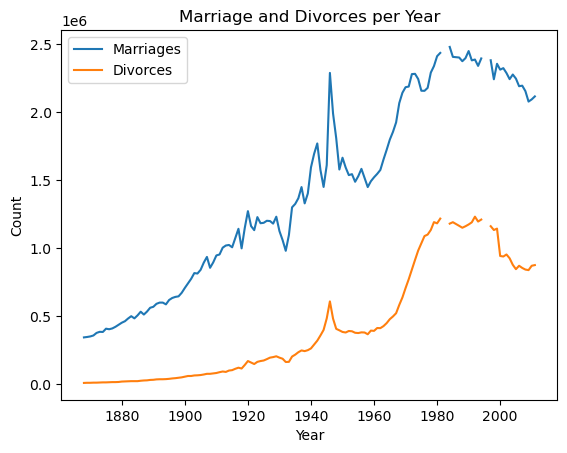

In [99]:
grp.plot('Year','Marriages',data=Both)
grp.plot('Year','Divorces',data=Both)
grp.title("Marriage and Divorces per Year")
grp.ylabel("Count")
grp.xlabel("Year")
grp.legend()
grp.show()


Question 7

Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [100]:
range=mrg_data[(mrg_data['Year']==1900) | (mrg_data['Year']==1950) | (mrg_data['Year']==2000) ]
range

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
33,1900,709000.0,56000.0,76094000,9.3,0.7
83,1950,1667000.0,385000.0,151684000,11.0,2.5
133,2000,2315000.0,944000.0,282398000,8.2,3.3


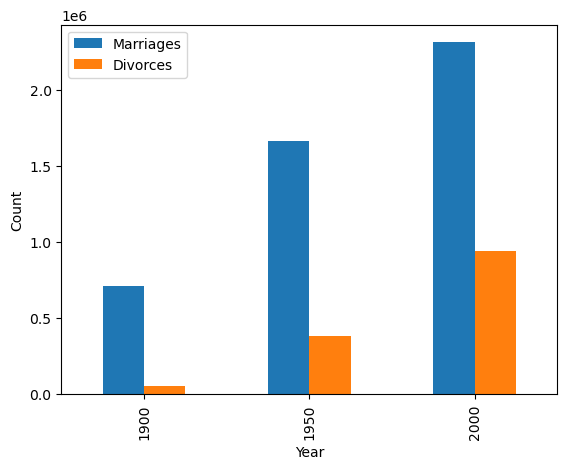

In [101]:
range.plot(x='Year',y=['Marriages','Divorces'],kind='bar')
grp.ylabel("Count")
grp.xlabel("Year")
grp.show()


Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

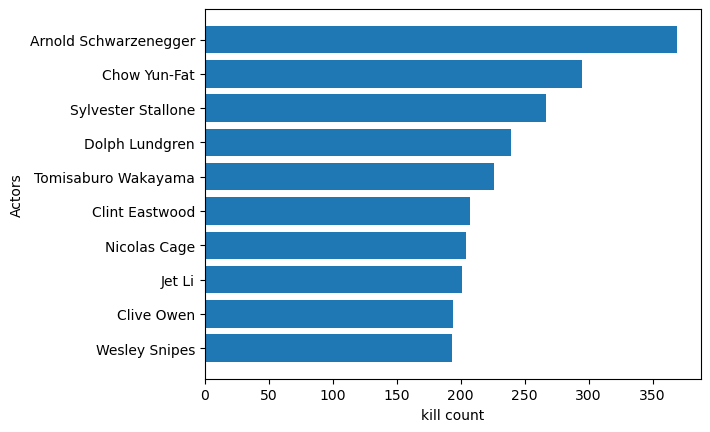

In [102]:
import matplotlib.pyplot as grp
import seaborn as D
import pandas as DK

holly_actors = DK.read_csv("actor_kill_counts.csv")
holly_actors.sort_values('Count',inplace=True)
x=holly_actors['Actor']
y=holly_actors['Count']

grp.xlabel('kill count')
grp.ylabel('Actors')

grp.barh(x,y)
grp.show()


Question 9

Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

In [103]:
import matplotlib.pyplot as grp
import seaborn as D
import pandas as DK

emperor=DK.read_csv('roman-emperor-reigns.csv')

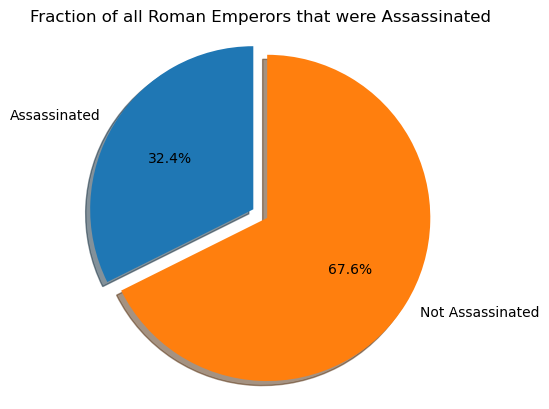

In [104]:

XYZ =emperor[emperor['Cause_of_Death'] == 'Assassinated']
num_assassinated = len(XYZ)
num_not_assassinated = len(emperor) - num_assassinated
fraction_assassinated = num_assassinated / len(emperor)

labels = ['Assassinated', 'Not Assassinated']
size = [fraction_assassinated, 1 - fraction_assassinated]
explode = (0.1, 0)
fig, ax = grp.subplots()
ax.pie(size, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Fraction of all Roman Emperors that were Assassinated')
grp.show()


Question 10

Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

C:\Users\jaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

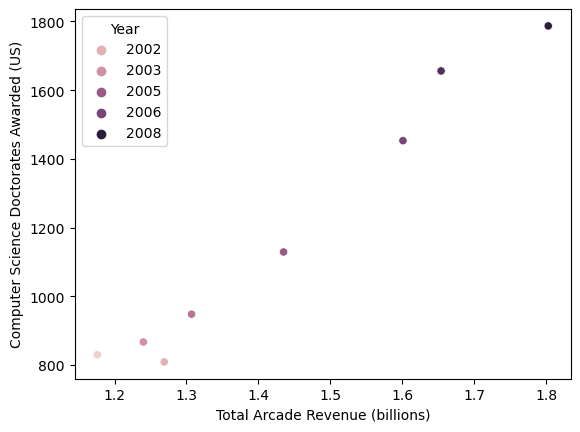

In [105]:
import matplotlib.pyplot as grp
import seaborn as S
import pandas as DK

revenue=DK.read_csv('arcade-revenue-vs-cs-doctorates.csv')
revenue
Total_revenue=revenue[(revenue['Year']>2000) & (revenue['Year']<2009)]
Total_revenue
S.scatterplot('Total Arcade Revenue (billions)','Computer Science Doctorates Awarded (US)',data=Total_revenue,hue='Year')